# Plots for BHmodified

In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()) + '/source')
import pickle
import numpy as np
import global_parameters as gp
import matplotlib.pyplot as plt
import matplotlib as mpl
from solver import compute_ell_r_phi, compute_h, compute_sigma2
from derivative import compute_dphidr, compute_dphidz
from simulation import simulate_ems_h, simulate_emission

mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (12, 8)
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['figure.autolayout'] = True

data_dir = os.path.dirname(os.getcwd()) + '/data/solution/'
figDir = os.path.dirname(os.getcwd())+ '/figures/'

sigma2 = compute_sigma2(gp.RHO, gp.SIGMA_Z, gp.MU_2)

In [3]:
sigma2, (gp.RHO, gp.SIGMA_Z, gp.MU_2)

(0.006532795676801678, (0.9, 0.00020999999999999998, 0.00186))

In [174]:
solu_yy = pickle.load(open(data_dir + "solu_modified_v6_101*50_1000_0224_21:20", "rb"))

In [175]:
solu_yy

{'e': array([[14.68049351, 14.48877955, 14.20200857, ...,  4.34440993,
          4.2165255 ,  4.15762134],
        [14.68190005, 14.48863744, 14.20180748, ...,  4.34383545,
          4.21575069,  4.15657744],
        [14.68333135, 14.48849494, 14.2016058 , ...,  4.34325492,
          4.21496577,  4.15551839],
        ...,
        [14.94066897, 14.47550424, 14.18395419, ...,  4.24255383,
          4.10487234,  3.90999547],
        [14.94463908, 14.4753737 , 14.18378692, ...,  4.24182762,
          4.10397331,  3.90747808],
        [14.94863645, 14.47524265, 14.18361905, ...,  4.24109668,
          4.10306925,  3.90494882]]),
 'phi': array([[ 5.41813640e-02,  5.35194377e-02,  5.28481579e-02, ...,
          1.90796931e-03, -1.81808439e-04, -2.32911033e-03],
        [ 5.41814122e-02,  5.35196378e-02,  5.28486447e-02, ...,
          2.06037020e-03, -2.30997141e-05, -2.16414742e-03],
        [ 5.41814606e-02,  5.35198393e-02,  5.28491362e-02, ...,
          2.21523725e-03,  1.38178492e-04, -

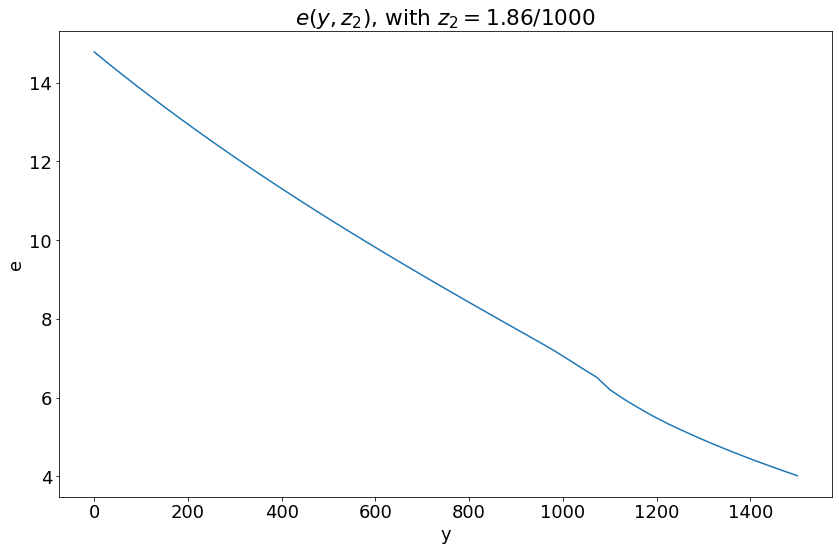

In [176]:
plt.plot(solu_yy['yGrid'], solu_yy['e'][50] )
plt.xlabel('y')
plt.ylabel('e')
plt.title(r'$e(y,z_2)$, with $z_2 = 1.86/1000$', )
plt.savefig('../figures/e_y.png')

In [177]:
np.sum(solu_yy['pi'][[2*x for x in range(153)]], axis=0)[0,0]

0.5000000000000001

In [178]:
def simulate_ems(Y, e, T=102, dt=1/4):
    periods = int(T/dt)
    et = np.zeros(periods)
    yt = np.zeros(periods)
    y = 870-580
    yt[0]= y
    for t in range(periods):
        loc = (np.abs(Y-y)).argmin()
        et[t] = e[loc]
        y = y + et[t]*dt
        yt[t] = y
    return et, yt

In [156]:
def simulate_emsn(Y, e, T=102, dt=1/4):
    periods = int(T/dt)
    et = np.zeros(periods)
    yt = np.zeros(periods)
    y = 870-580
    yt[0]= y
    for t in range(periods):
        et[t] = np.interp(y, Y, e)
#         et[t] = e[loc]
        y = y + et[t]*dt
        yt[t] = y
    return et, yt

In [157]:
def simulate_h(yt, h, Y):
    ht = np.interp(yt, Y, h)
    return ht

In [158]:
def simulate_pi(yt, pi, Y):
    pit = np.interp(yt, Y, pi)
    return pit

In [179]:
et, yt = simulate_emsn(solu_yy['yGrid'], solu_yy['e'][50])

In [180]:
et.shape

(408,)

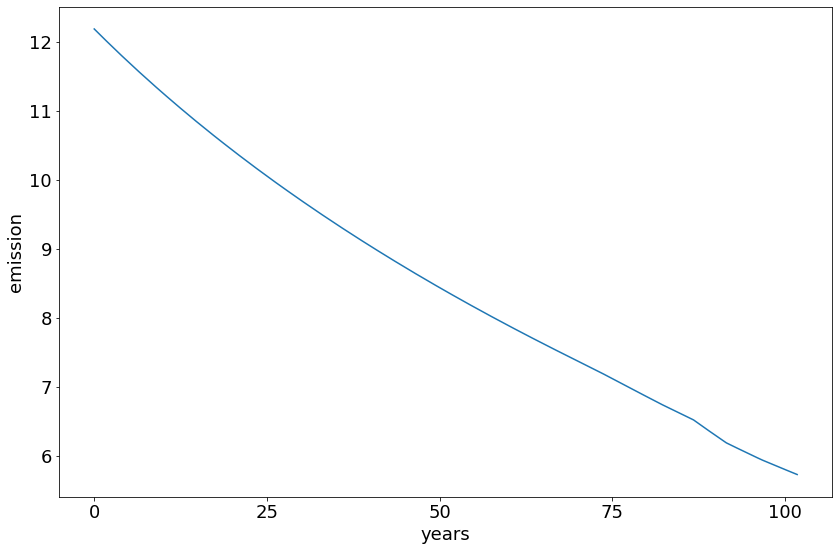

In [181]:
# 300 represents number of points to make between T.min and T.max
plt.plot(et)
# plt.plot(solu_bbh[0]['y'], label="BBH")
# plt.legend()
plt.xlabel('years')
plt.ylabel('emission')
plt.xticks(np.arange(0,408,100), np.arange(0,102,25))
# plt.title(r'$e_t$ with $z_2 \approx 1.86/1000$')
plt.savefig(figDir + 'e_t.png')

In [18]:
ht = simulate_h(yt, solu_yy['h2'][50], solu_yy['yGrid'])

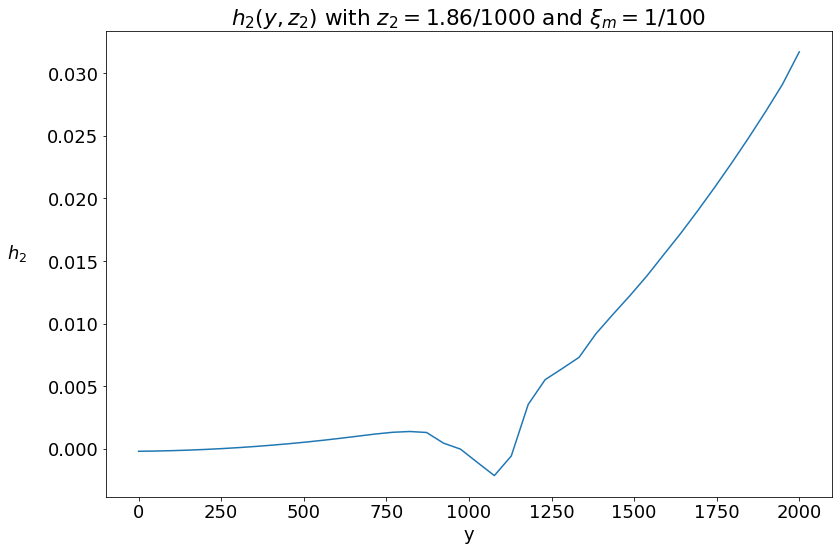

In [44]:
plt.plot(solu_yy['yGrid'], solu_yy['h2'][50])
plt.xlabel('y')
plt.ylabel('$h_2$', rotation=0, labelpad=30)
plt.title(r'$h_2(y, z_2)$ with $z_2 = 1.86/1000$ and $\xi_m=1/100$')
plt.savefig("h_y.png")

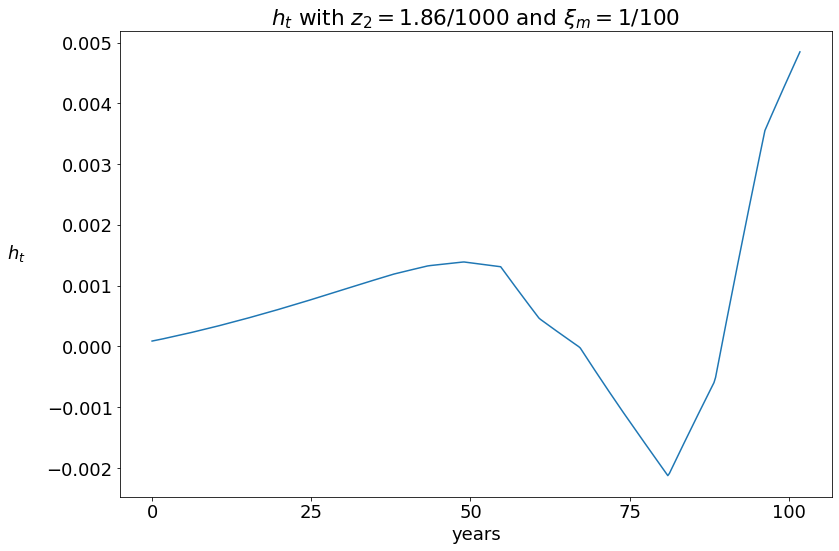

In [45]:
# 300 represents number of points to make between T.min and T.max
plt.plot(ht, label="new HJB")
# plt.plot(solu_bbh[0]['y'], label="BBH")
# plt.legend()
plt.xlabel('years')
plt.ylabel('$h_t$', rotation=0, labelpad=30)
plt.xticks(np.arange(0,408,100), np.arange(0,102,25))
plt.title(r'$h_t$ with $z_2 = 1.86/1000$ and $\xi_m=1/100$')
plt.savefig('ht.png')

In [34]:
solu = pickle.load(open(data_dir + "solu_modified_v6_101*40_0.001_0223_14:50", "rb"))

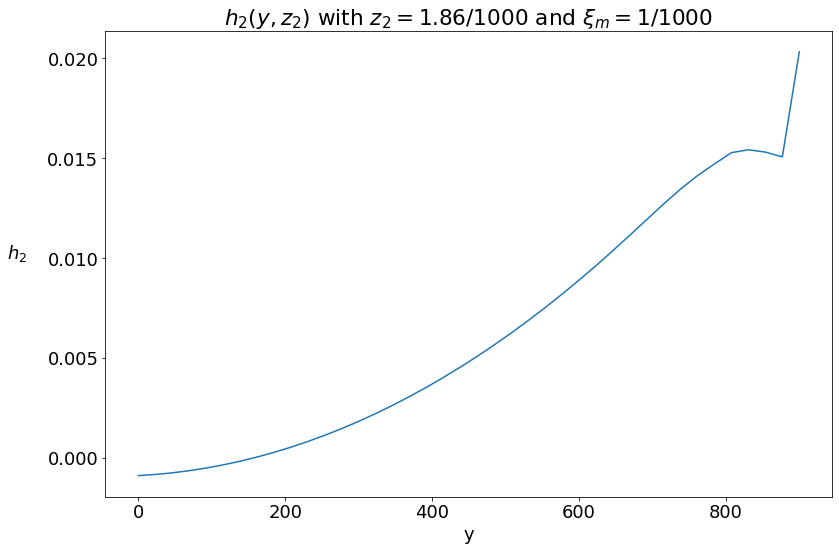

In [48]:
plt.plot(solu['yGrid'], solu['h2'][50])
plt.xlabel('y')
plt.ylabel('$h_2$', rotation=0, labelpad=30)
plt.title(r'$h_2(y, z_2)$ with $z_2 = 1.86/1000$ and $\xi_m=1/1000$')
# plt.savefig("h_y_1000.png")

In [49]:
ett, ytt = simulate_emsn(solu['yGrid'], solu['e'][50])

In [50]:
htt = simulate_h(ytt, solu['h2'][50], solu['yGrid'])

Text(0.5, 1.0, '$h_t$ with $z_2 = 1.86/1000$ and $\\xi_m=1/1000$')

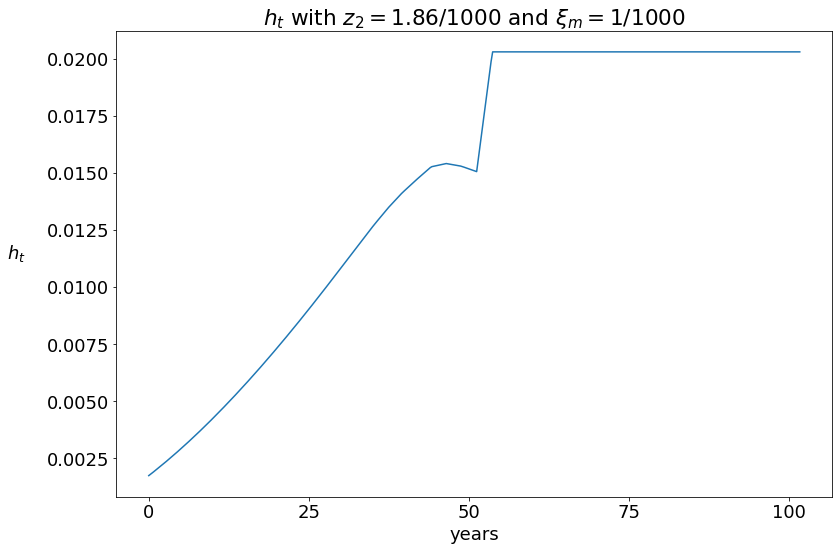

In [55]:
# 300 represents number of points to make between T.min and T.max
plt.plot(htt, label="new HJB")
# plt.plot(solu_bbh[0]['y'], label="BBH")
# plt.legend()
plt.xlabel('years')
plt.ylabel('$h_t$', rotation=0, labelpad=30)
plt.xticks(np.arange(0,408,100), np.arange(0,102,25))
plt.title(r'$h_t$ with $z_2 = 1.86/1000$ and $\xi_m=1/1000$')
# plt.savefig('ht_1000.png')

In [56]:
solu2 = pickle.load(open(data_dir + "solu_modified_v6_101*50_0.00025_0223_15:52", "rb"))

Text(0.5, 1.0, '$h_2(y,z_2)$ with $z_2=1.86/1000$ and $\\xi_m = 1/4000$')

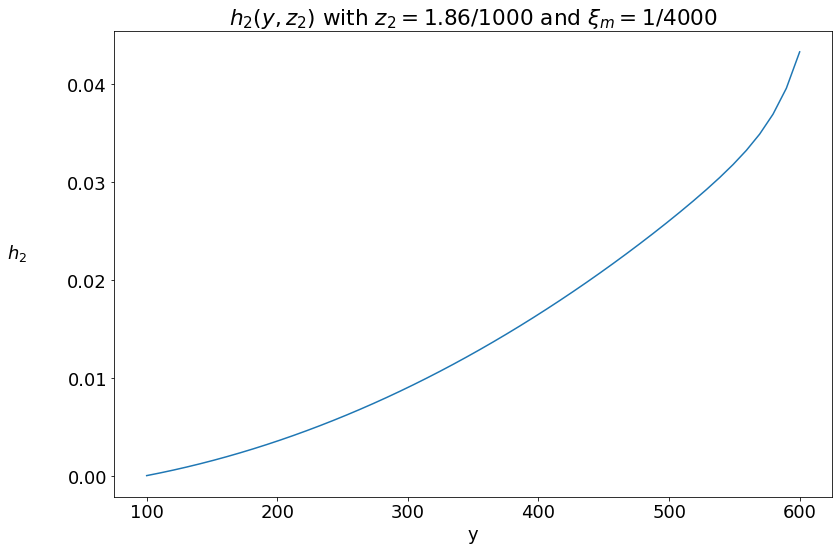

In [71]:
plt.plot(solu2['yGrid'], solu2['h2'][50])
plt.xlabel('y')
plt.ylabel(r'$h_2$', rotation=0, labelpad=50)
plt.title(r'$h_2(y,z_2)$ with $z_2=1.86/1000$ and $\xi_m = 1/4000$')
# plt.savefig('h_y_4000.png')

Text(0.5, 1.0, '$h_2(y,z_2)$ with $z_2=1.86/1000$ and $\\xi_m = 1/4000$')

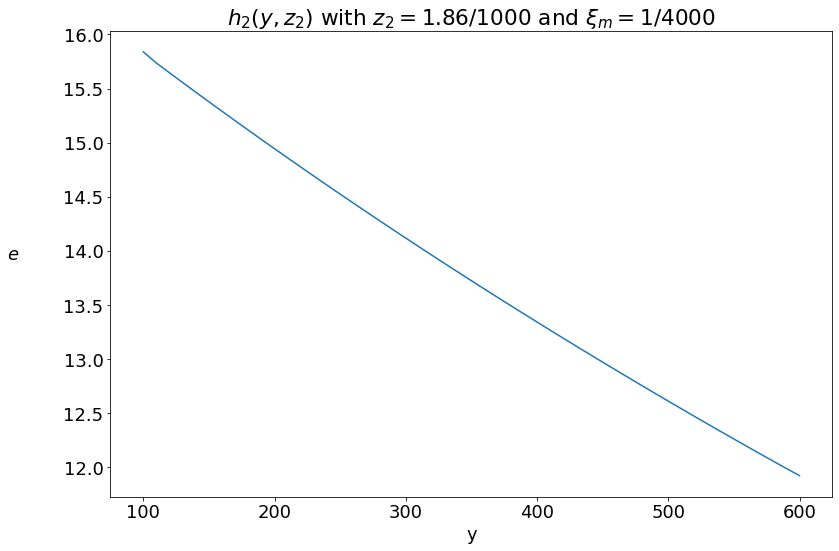

In [142]:
plt.plot(solu2['yGrid'], solu2['e'][50])
plt.xlabel('y')
plt.ylabel(r'$e$', rotation=0, labelpad=50)
plt.title(r'$h_2(y,z_2)$ with $z_2=1.86/1000$ and $\xi_m = 1/4000$')
# plt.savefig('h_y_4000.png')

In [76]:
et2, yt2 = simulate_emsn(solu2['yGrid'], solu2['e'][50], T=20)

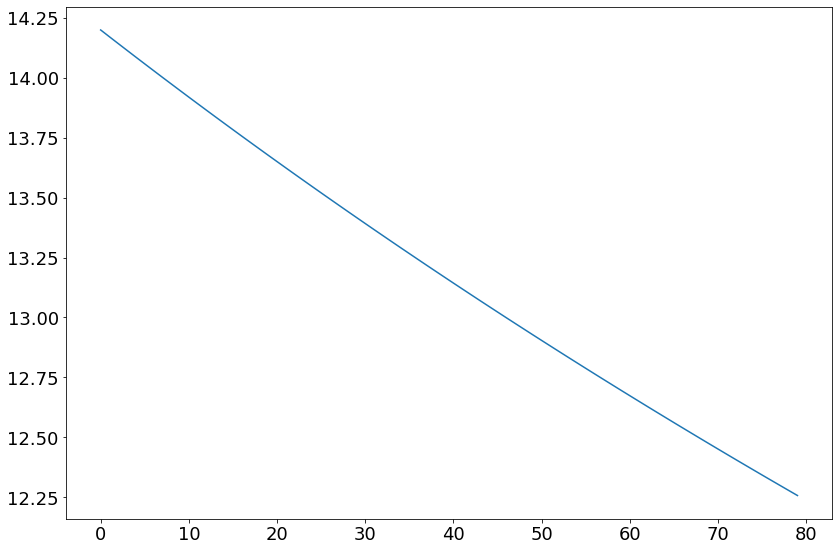

In [77]:
plt.plot(et2)

In [78]:
ht2 = simulate_h(yt2, solu2['h2'][50], solu2['yGrid'])

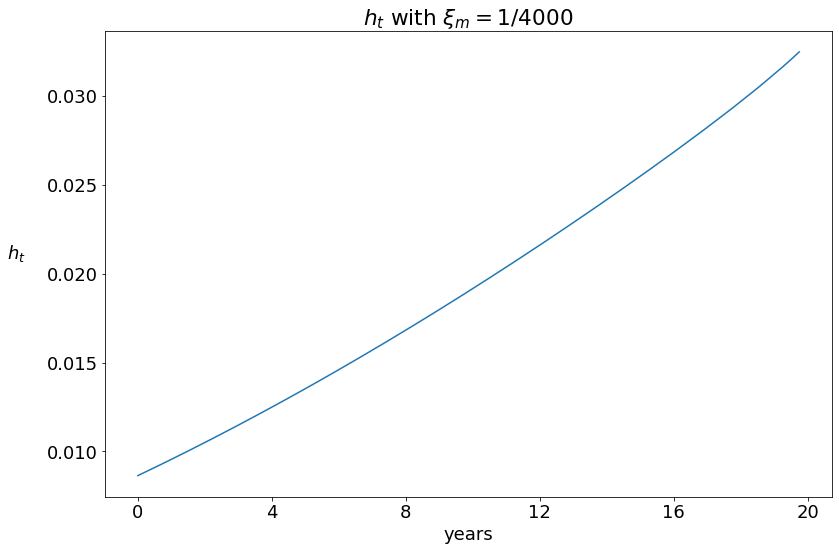

In [87]:
plt.plot(ht2)
plt.xticks(np.arange(0,20*4+1,16), np.arange(0,20+1,4))
plt.xlabel('years')
plt.ylabel('$h_t$', rotation=0, labelpad=30)
plt.title(r'$h_t$ with $\xi_m=1/4000$')
plt.savefig('ht_4000.png')

In [150]:
solu3 = pickle.load(open(data_dir + "solu_modified_v6_51*50_0.01_0.0001_0224_13:33", "rb"))

In [151]:
solu3

{'e': array([[0.9994548 , 0.99889052, 0.99832688, ..., 0.97360518, 0.97306971,
         0.9702406 ],
        [0.99943684, 0.99883482, 0.99823353, ..., 0.97064956, 0.96754743,
         0.96446506],
        [0.99941889, 0.99877791, 0.99813775, ..., 0.9649612 , 0.96169727,
         0.95845534],
        ...,
        [0.99859338, 0.99485234, 0.99113922, ..., 0.60348826, 0.59606875,
         0.58882947],
        [0.99857545, 0.99473881, 0.99093155, ..., 0.59596609, 0.58854571,
         0.58130783],
        [0.99855751, 0.9946241 , 0.99072155, ..., 0.58851974, 0.58110127,
         0.57386749]]),
 'phi': array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 'dphidz': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ...

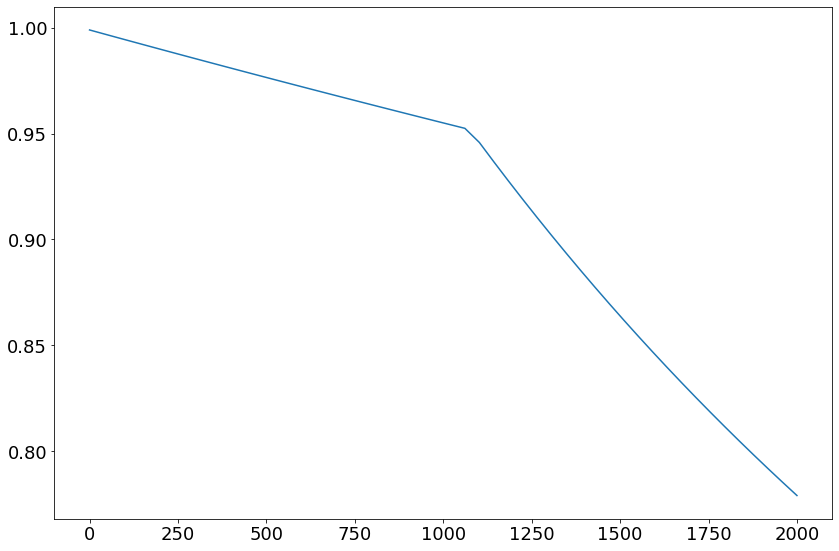

In [149]:
plt.plot(solu3['yGrid'],  solu3['e'][25])

In [135]:
et3, yt3 = simulate_emsn(solu3['yGrid'], solu3['e'][75])

In [136]:
ht3 = simulate_h(yt3, solu3['h2'][75], solu3['yGrid'])

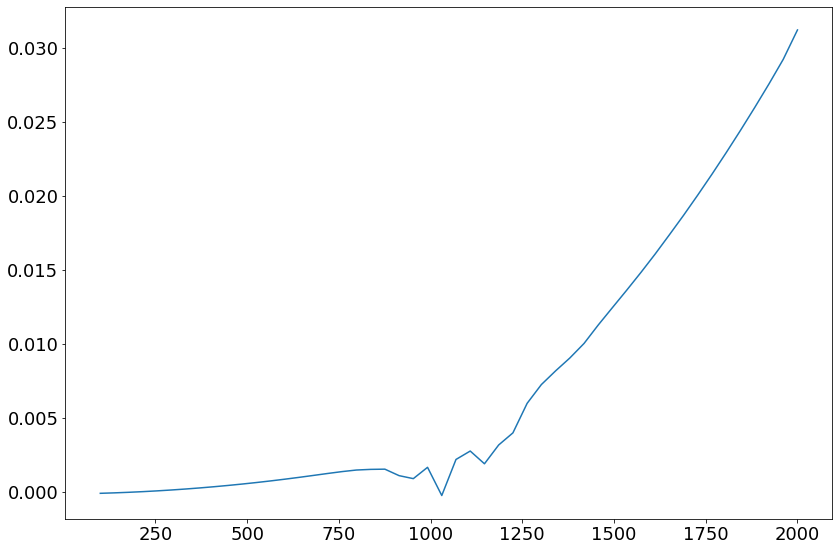

In [140]:
plt.plot(solu3['yGrid'],solu3['h2'][75])

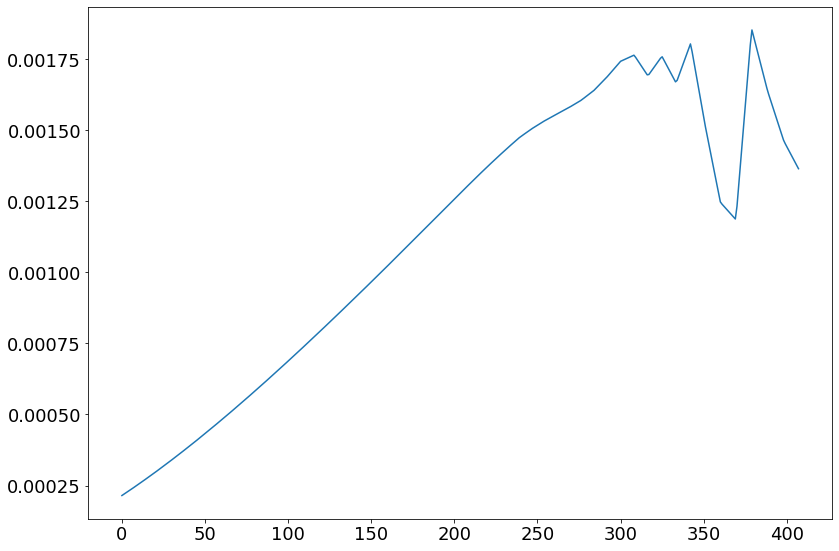

In [127]:
plt.plot(ht3)

In [ ]:
numz = 10
z_min = 1.86/1000 - 4*.42/1000
z_max = 1.86/1000 + 4*.42/1000
zs = np.linspace(z_min, z_max, numz)

n_ell = 50
log_ell = np.linspace(-13, -5, 50)
ell_step = 1e-7
ells = np.zeros(n_ell*2)
for i in range(n_ell):
    ell = np.exp(log_ell[i])
    ells[2*i] = ell
    ells[2*i + 1] = ell + ell_step 

y = np.linspace(0, 3000, 20)

In [ ]:
# y and emmission
plt.plot(y, solu_yy[ells[0]]["e"][2,-1])
plt.xlabel("y")
plt.ylabel('emission')
plt.title(r'$e(y,\  b=1,\  z_2 = 1.86/1000 , \ \ell = e^{-13})$')
# plt.savefig(figDir + "e_y.png")

In [ ]:
solu_yy[ells[0]]["e"][2,-1]

In [ ]:
plt.plot(y, solu_yy[ells[0]]["psi"][2,-1])
plt.xlabel("y")
plt.ylabel(r'$\phi$', rotation=0)
plt.title(r'$\phi(y,\  b=1,\  z_2 = 1.86/1000 , \ \ell = e^{-13})$')
# plt.savefig(figDir + "phi_y.png")

In [ ]:
#### em = np.zeros(n_ell*2)
for i in range(n_ell*2):
    em[i] = solu_yy[ells[i]]["e"][2,-1,-1]

In [ ]:
plt.plot(ells, em)
plt.xlabel(r"$\ell$")
plt.ylabel(r'e', rotation=0, labelpad=20)
plt.title(r'$e(y=3000,\  b=1,\  z_2 = 1.86/1000 , \ \ell )$')
# plt.savefig(figDir + "e_ell.png")

In [ ]:
phis = np.zeros(n_ell*2)
for i in range(n_ell*2):
    phis[i] = solu_yy[ells[i]]["psi"][2,-1,-1]

In [ ]:
plt.plot(ells, phis)
plt.xlabel(r"$\ell$")
plt.ylabel(r'$\phi$', rotation=0, labelpad=20)
plt.title(r'$\phi(y=3000,\  b=1,\  z_2 = 1.86/1000 , \ \ell )$')
# plt.savefig(figDir + "phi_ell.png")
plt.show()

In [ ]:
# compute r
numy = 20
ell_step = 1e-7
psis = np.zeros((numz, numy, n_ell*2))
r_grid = np.zeros((numz, numy, n_ell*2))
for i, ell in enumerate(ells):
    psis[:, :, i] = solu_yy[ell]['psi'][:, -1] 

In [ ]:
phi = np.zeros((numz, numy, n_ell))
ell_grid = np.zeros(n_ell)
r_grid = np.zeros((numz, numy, n_ell))
for i, lnell in enumerate(log_ell):
    dphi = (psis[:, :, 2*i + 1] - psis[:, :, 2*i])/ell_step
    ell_grid[i] = np.exp(lnell) + ell_step/2
    r_grid[:, :, i] = -dphi
    phi[:, :, i] = (psis[:, :, 2*i + 1] + psis[:, :, 2*i])/2

In [ ]:
plt.plot(r_grid[2,10], phi[2,10])

In [ ]:
plt.plot(ell_grid, r_grid[2,10])

In [ ]:
dphidz = np.zeros((numz-1, numy, n_ell))
dphidz = (phi[1:] - phi[:-1])/(zs[1] - zs[0])
z_new = (zs[1:] + zs[:-1])/2

In [ ]:
y[10]

In [ ]:
zs[4], (zs[1:] + zs[:-1])/2, z_new

In [ ]:
plt.plot(ell_grid, - dphidz[4, 10]*z_new[4]*sigma2**2/XI_M*1e6)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\sqrt{z_2} \sigma_2 h_2$', rotation=0, labelpad=50)
plt.title(r'$z_2 = 1.86/1000, y = 1500$')
# plt.savefig(figDir + "h_ell.png")

In [ ]:
ell, r, phi = compute_ell_r_phi(solu_yy, z = z)

In [ ]:
# import solution
data_dir = os.path.dirname(os.getcwd()) + '/data/solution/'
xi_multi_list = [1, 2, 4]
solu = dict()
for xi_multi in xi_multi_list:
    solu[xi_multi] = pickle.load(open(data_dir + "solu_modified_40*200*200_{:d}0_0203".format(xi_multi), "rb"))

In [ ]:
log_ell = np.linspace(-13, -5, 200)
ell_step = 1e-7

In [ ]:
figDir = os.path.dirname(os.getcwd())+ '/figures/'

In [ ]:
figDir

## generate $\ell$, r and $\phi$
${\frac {(z_2)^2 y^2} 2} $

In [ ]:
# compute sorted grids
Z = np.linspace(1e-5, 2, 40)
ell = dict()
r = dict()
phi = dict()
for xi_multi in xi_multi_list:
    ell[xi_multi], r[xi_multi], phi[xi_multi] = compute_ell_r_phi(solu=solu[xi_multi],
                                                                 z=Z)

In [ ]:
%matplotlib widget
plt.plot(r[1][:, 20], ell[1])
plt.show()

In [ ]:
%matplotlib widget
plt.plot(ell[1], r[1][:, 7])
plt.plot(ell[1], r[1][:, 10])
plt.plot(ell[1], r[1][:, 13])
plt.xlabel(r'$\ell$')
plt.show()

In [ ]:
# compute r, emission and phi
r_new = dict()
phi_new = dict()
ems = dict()
for xi_multi in xi_multi_list:
    r_new[xi_multi], phi_new[xi_multi], ems[xi_multi] = compute_dphidr(phi[xi_multi], r[xi_multi],z=Z)

In [ ]:
plt.plot(ems[1][:, 10])
plt.plot(ems[2][:, 10])

In [ ]:
ems[1][:, 10].shape

## Generate z and $\frac{\partial \phi}{\partial z}(r,z)$

In [ ]:
z_new = dict()
dphi_dz = dict()
for xi_multi in xi_multi_list:
    z_new[xi_multi], dphi_dz[xi_multi] = compute_dphidz(phi[xi_multi], z=Z)

In [ ]:
plt.plot(r[1][:, 0], dphi_dz[1][:, 0])

## Generate distortion
Formula:
$$
    \sqrt{z_2} \sigma_2 h_2 = - \frac{\frac{\partial \phi}{\partial z}(r,z) z_2 \sigma_2^2}{\xi_m}
$$

In [ ]:
SIGMA_2 = compute_sigma2(RHO, .21, 1)
h_z = dict()
for xi_multi in xi_multi_list:
    h_z[xi_multi] = compute_h(dphi_dz[xi_multi], z_new[xi_multi], args=(SIGMA_2, XI_m/xi_multi))

In [ ]:
plt.plot(ell[1], h_z[1][:, 7])
plt.plot(ell[1], h_z[1][:, 10])
plt.plot(ell[1], h_z[1][:, 13])

In [ ]:
fig = plt.figure(figsize=(12, 8), dpi=100)
plt.plot(ell[1], h_z[1][:, 13], label=r'90 percentile of $z_2$')
plt.plot(ell[1], h_z[1][:, 10], label=r'50 percentile of $z_2$')
plt.plot(ell[1], h_z[1][:, 7], label=r"10 percentile of $z_2$")
plt.legend(title=r"with $\xi_m=.000256$")
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\sqrt{z_2}\sigma_2 h_2$", labelpad = 45, rotation = 0)
plt.title("implied distortion - multiplier")
# plt.savefig("../figures/h_ell_0202.png", bbox_inches='tight', facecolor = "white")
plt.show()

In [ ]:
fig = plt.figure(figsize=(12, 8), dpi=100)
plt.plot(ell[4], h_z[4][:, 20], label=r'$\xi_m/40$')
plt.plot(ell[2], h_z[2][:, 20], label=r"$\xi_m/20$")
plt.plot(ell[1], h_z[1][:, 20], label=r"$\xi_m /10$")
plt.legend(title=r"original $\xi_m$ = .00256, median $z_2$")
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\sqrt{z_2}\sigma_2 h_2$", labelpad=45, rotation=0)
plt.title("implied distortion - multiplier")
# plt.savefig("../figures/h_ell_xi_0202.png", bbox_inches='tight', facecolor = "white")
plt.show()

In [ ]:
fig = plt.figure(figsize=(12, 8), dpi=100)
plt.plot(r[4][:, 10], h_z[4][:, 20], label=r'$\xi_m/10$')
plt.plot(r[2][:, 10], h_z[2][:, 20], label=r'$\xi_m/20$')
plt.plot(r[1][:, 10], h_z[1][:, 20], label=r'$\xi_m/40$')
plt.legend(title=r"original $\xi_m$ = .00256, median $z_2$ ")
plt.xlabel(r"$r$")
plt.ylabel(r"$\sqrt{z_2}\sigma_2 h_2$", labelpad=45, rotation=0)
plt.title("implied distortion - reserve")
# plt.savefig("../figures/h_r_0202.png", bbox_inches='tight', facecolor="white")
plt.show()

## Simulate emission and h

In [ ]:
ems_t = dict()
h_t = dict()
for xi_multi in xi_multi_list:
    ems_t[xi_multi], h_t[xi_multi] = simulate_ems_h(dphi_dz[xi_multi], z_new[xi_multi], 
                                                   20, r[xi_multi][:,20], ems[xi_multi][:,20],
                                                    SIGMA_2, XI_m/xi_multi,
                                                   z=Z)

In [ ]:
plt.plot(ems_t[1])

In [ ]:
ems_ = dict()
h_ = dict()
for pos in [20, 14, 26]:
    ems_[pos], h_[pos] = simulate_ems_h(dphi_dz[1], z_new[1], pos, r[1][:, pos], ems[1][:, pos],
                                sigma_2=SIGMA_2, xi=XI_m/1, z=Z)

In [ ]:
fig = plt.figure(figsize=(12, 8), dpi=100)
for pos, percentile in [[26, 90], [20, 50], [14, 10]]:
    plt.plot(h_[pos], label=r'{:d}th percentile of $z_2$'.format(percentile))
plt.legend(title=r"original $\xi_m$ = .000256 ")
plt.xlabel("year")
plt.ylabel("implied distortion")
plt.title("implied distortion - time")
# plt.savefig("../figures/ht_0201.png", bbox_inches='tight', facecolor = "white")
plt.show()

In [ ]:
fig = plt.figure(figsize = (12,8), dpi = 100)
for xi_multi in [4, 2, 1]:
    plt.plot(h_t[xi_multi], label=r'$\xi_m/{:d}$'.format(10*xi_multi))
plt.legend(title = r"original $\xi_m$ = .00256, median $z_2$ ")
plt.xlabel("year")
plt.ylabel("implied distortion")
plt.title("implied distortion - time")
# plt.savefig("../figures/ht_0202.png", bbox_inches='tight', facecolor = "white")
plt.show()

In [ ]:
fig = plt.figure(figsize = (12,8), dpi = 100)
for pos, percentile in [[14, 10], [20, 50], [26, 90]]:
    plt.plot(ems_[pos], label=r'{:d}th percentile of $z_2$'.format(percentile))
plt.legend()
plt.xlabel("year")
plt.ylabel("emission")
plt.savefig("../figures/et_0201.png", bbox_inches='tight', facecolor = "white")
plt.show()

In [ ]:
solu_yb = pickle.load(open(data_dir + "solu_modified_5*50*200_10_0205", "rb"))

In [ ]:
n_ell = 200
ell_step = 1e-7
log_ell = np.linspace(-13, -5, n_ell)
ells = np.zeros(n_ell*2)
for i in range(n_ell):
    ell = np.exp(log_ell[i])
    ells[2*i] = ell
    ells[2*i + 1] = ell + ell_step 

In [ ]:
loc = np.abs(ells - 1e-4).argmin()
ells[loc]

In [ ]:
n_y = 50
ys = np.linspace(0, 3000, n_y)

In [ ]:
#  y and phi
plt.plot(ys, solu_yb[ells[189]]["psi"][-1])
plt.xlabel('y')
plt.ylabel(r'$\phi$', rotation = 0, labelpad = 15)
plt.title(r'$\phi(y, b=1)$ with $z_2 = 1$ and $\ell \approx 1e-4 $')
# plt.savefig("../figures/phi_y.png")

In [ ]:
plt.plot(ys, solu_yb[ells[189]]["e"][-1])
plt.xlabel('y')
plt.ylabel(r'$e$', rotation = 0, labelpad = 20)
plt.title(r'$e(y, b = 1)$ with $z_2 = 1$ and $\ell \approx 1e-4$')
# plt.savefig("../figures/e_y.png")

In [ ]:
phis = np.zeros((3, n_ell*2))
for i, y_i in enumerate([0, 25-1, -1]):
    for j in range(2*n_ell):
        phis[i,j] = solu_yb[ells[j]]["psi"][-1,y_i]
        
emss = np.zeros((3, n_ell*2))
for i, y_i in enumerate([0, 25-1, -1]):
    for j in range(2*n_ell):
        emss[i,j] = solu_yb[ells[j]]["e"][-1,y_i]

In [ ]:
phis[0].shape, ells.shape

In [ ]:
plt.plot(ells, phis[0])
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\phi$', rotation = 0)
plt.title(r'$\phi(y=0,b=1; \ell)$ with $z_2 = 1$')
# plt.savefig('../figures/phi_ell.png')

In [ ]:
plt.plot(ells, emss[0])
plt.xlabel(r'$\ell$')
plt.ylabel(r'$e$', rotation = 0, labelpad=20)
plt.title(r'$e(y=0,b=1; \ell)$ with $z_2 = 1$')
# plt.savefig('../figures/e_ell.png')

In [ ]:
solu_zyb = pickle.load(open(data_dir + 'solu_modified_20*50*50*100_0209', 'rb'))

In [ ]:
n_ell = 100
ell_step = 1e-7
log_ell = np.linspace(-13, -5, n_ell)
ells = np.zeros(n_ell*2)
for i in range(n_ell):
    ell = np.exp(log_ell[i])
    ells[2*i] = ell
    ells[2*i + 1] = ell + ell_step 

In [ ]:
n_y = 50
ys = np.linspace(0, 3000, n_y)

n_z = 20
zs = np.linspace(1e-5, 2, n_z)

In [ ]:
plt.plot(ys, solu_zyb[ells[0]]['psi'][2, -1])
# plt.plot(ys, solu_zyb[ells[0]]['psi'][-1, -1])
plt.xlabel('y')
plt.ylabel(r'$\phi$', rotation=0)
plt.title(r'$\phi(y, b=1, z_2=1; \ell \approx 1e-4)$')
# plt.savefig(figDir + 'phi_y_z.png')

In [ ]:
plt.plot(ys, solu_zyb[ells[0]]['e'][2, -1])
# plt.plot(ys, solu_zyb[ells[0]]['e'][-1, -1])
plt.xlabel('y')
plt.ylabel(r'e', rotation=0, labelpad=20)
plt.title(r'$e(y, b=1, z_2 =1; \ell \approx 1e-4)$')
# plt.savefig(figDir + 'e_y_z.png')

In [ ]:
phis_zyb = np.zeros(n_ell*2)
emss_zyb = np.zeros(n_ell*2)
for i in range(n_ell*2):
    phis_zyb[i] = solu_zyb[ells[i]]['psi'][2, -1, 0]
    emss_zyb[i] = solu_zyb[ells[i]]['e'][2, -1, 0]

In [ ]:
plt.plot(ells, phis_zyb)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\phi$', rotation=0, labelpad=20)
plt.title(r'$\phi(y=0, b=1, z_2=1; \ell)$')
# plt.savefig(figDir + 'phi_ell_z.png')

In [ ]:
plt.plot(ells, emss_zyb)
plt.xlabel(r'$\ell$')
plt.ylabel(r'e', rotation=0, labelpad=20)
plt.title(r'$e(y=0, b=1, z_2=1; \ell)$')
# plt.savefig(figDir + 'e_ell_z.png')

In [ ]:
ell, r, phi = compute_ell_r_phi(solu=solu_zyb, z=zs)